# OSEMN Exercises

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import numpy.random as npr

1\. Create a random list of number and then save it to a text file named "simple_data.txt"

In [2]:
simp = list(np.random.random(30))
file = open('simple_data.txt','w')
file.write(str(simp))
file.close()

2\. Create a random matrix of 5x5 and then save it to a text file named "data.txt"

In [3]:
mat = npr.rand(5,5)
print(mat)
file = open('data.txt','w')
file.write(str(mat))
file.close()

[[0.36443863 0.36945898 0.26476167 0.44976618 0.59910545]
 [0.00947436 0.21272589 0.07441071 0.55184506 0.35225129]
 [0.75647676 0.61964021 0.64239845 0.6577229  0.96931521]
 [0.36025761 0.90981069 0.70095139 0.65248167 0.54252102]
 [0.65074408 0.44736246 0.46339387 0.20293716 0.83375669]]


3\. Load the saved txt file of point 2 and convert it to a csv file (by hand)

In [4]:
file = open('data.csv','w')
with open('data.txt', 'r') as dati:
    for line in dati:
        for c in line.split():
            file.write(c+',')
file.close()

4\. load the binary file named *credit_card.dat* and convert the data into the real credit-card number.
Each line correspond to a credit card number.
Each character is composed by 6 bit (even the space) and the last 4 bit are just a padding

**hint**: use the `chr()` function to convert a number to a char

In [5]:
with open('credit_card.dat','r') as card:
    for a in card:
        number = []
        for i in range(0,len(a)-5,6):
            x = a[i+1] + a[i+2] + a[i+3] + a[i+4] + a[i+5] 
            number.append(int(x,2))
        print(number)

[23, 22, 20, 24, 0, 21, 22, 23, 19, 0, 19, 23, 23, 21, 0, 18, 18, 23, 17]
[19, 18, 21, 23, 0, 24, 18, 20, 23, 0, 19, 19, 21, 20, 0, 18, 18, 22, 22]
[18, 23, 18, 18, 0, 16, 16, 16, 17, 0, 20, 16, 17, 17, 0, 22, 22, 21, 18]
[16, 22, 22, 17, 0, 19, 16, 22, 19, 0, 19, 23, 20, 18, 0, 19, 17, 21, 16]
[16, 20, 19, 18, 0, 17, 22, 16, 24, 0, 17, 20, 22, 18, 0, 20, 23, 20, 18]
[21, 24, 18, 23, 0, 18, 16, 18, 23, 0, 24, 23, 24, 21, 0, 23, 19, 16, 19]
[21, 23, 23, 20, 0, 24, 21, 18, 24, 0, 18, 16, 24, 23, 0, 17, 17, 17, 23]
[24, 17, 20, 16, 0, 17, 18, 17, 16, 0, 22, 19, 21, 18, 0, 18, 24, 20, 21]
[21, 23, 22, 20, 0, 17, 17, 19, 19, 0, 23, 19, 16, 17, 0, 23, 17, 16, 16]
[22, 20, 21, 22, 0, 17, 23, 19, 23, 0, 20, 17, 18, 22, 0, 22, 23, 18, 22]
[17, 18, 18, 24, 0, 24, 22, 19, 17, 0, 23, 19, 24, 18, 0, 16, 16, 16, 16]
[23, 16, 21, 17, 0, 16, 17, 22, 16, 0, 21, 19, 23, 20, 0, 19, 17, 22, 22]
[16, 22, 17, 24, 0, 19, 21, 24, 23, 0, 17, 22, 19, 16, 0, 22, 19, 23, 22]
[17, 21, 20, 21, 0, 21, 20, 21, 20, 0,

5\. Load the file "user_data.json", filter the data by the "CreditCardType" field equals to "American Express". Than save the data a to CSV.

In [6]:
import json
import csv
users = json.load(open('user_data.json'))
fi = open('user_data_AmEx.csv','w')
with fi:
    fnames = ['ID','JobTitle','EmailAddress', 'FirstNameLastName', 'CreditCard', 'CreditCardType']
    writer = csv.DictWriter(fi, fieldnames=fnames)
    writer.writeheader()
    for i in range(len(users)):
        if users[i]['CreditCardType'] == 'American Express' :
            writer.writerow(users[i])
fi.close()

6\. Load the file from this url: [https://www.dropbox.com/s/7u3lm737ogbqsg8/mushrooms_categorized.csv?dl=1](https://www.dropbox.com/s/7u3lm737ogbqsg8/mushrooms_categorized.csv?dl=1) with Pandas. 
+ Explore the data (see the info of the data)
+ Draw the istogram of the 'class' field. Decribe wath yuou see


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,...,2,5,5,0,1,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,0,11,...,2,5,5,0,0,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,0,5,...,2,5,5,0,1,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,1,0,...,1,7,7,0,2,1,0,7,4,2


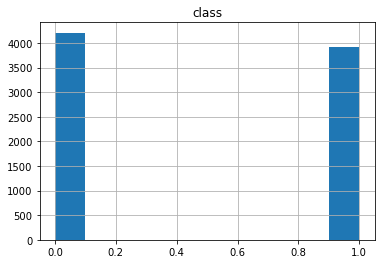

In [3]:
import pandas as pd
import urllib.request
url ='https://www.dropbox.com/s/7u3lm737ogbqsg8/mushrooms_categorized.csv?dl=1'
with urllib.request.urlopen(url) as data_file:
    data = pd.read_csv(data_file) 

%matplotlib inline
data.hist('class')
data

7\. Load the remote file [https://www.dropbox.com/s/vkl89yce7xjdq4n/regression_generated.csv?dl=1](https://www.dropbox.com/s/vkl89yce7xjdq4n/regression_generated.csv?dl=1) with Pandas and plot a scatter plot all possible combination of the following fields:
    
  + features_1
  + features_2
  + features_3

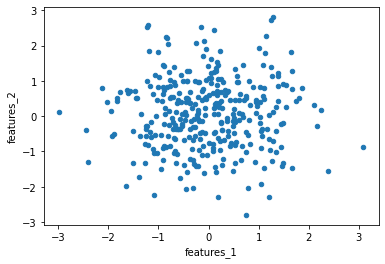

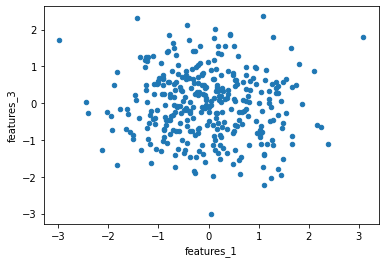

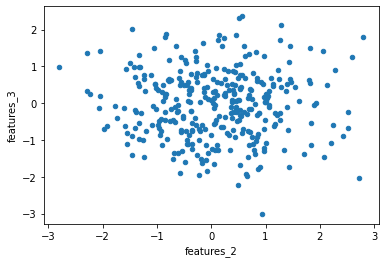

In [8]:
import pandas as pd
import urllib.request
url ='https://www.dropbox.com/s/vkl89yce7xjdq4n/regression_generated.csv?dl=1'
with urllib.request.urlopen(url) as data_file:
    data = pd.read_csv(data_file)
#print(data)

%matplotlib inline
data.plot.scatter('features_1','features_2')
data.plot.scatter('features_1','features_3')
data.plot.scatter('features_2','features_3')

8\. Load the same file of point 6, and convert the file to json with Pandas.

In [9]:
import pandas as pd
import urllib.request
url ='https://www.dropbox.com/s/7u3lm737ogbqsg8/mushrooms_categorized.csv?dl=1'
with urllib.request.urlopen(url) as data_file:
    data = pd.read_csv(data_file)
data.to_json('mushrooms_categorized.json')